## Applied - Question 8

This question will use a simulated dataset

#### Import block

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm

%matplotlib inline
plt.style.use('seaborn-white')

Getting the data through simulation

In [19]:
# set seed
np.random.seed(1)

# Simulate data
x = np.random.normal(0, 1, 100)
error = np.random.normal(0, 1, 100)
y = x - 2 * (x**2) + error

(a) n = 100, p = 2. The equation: $y = x - 2x^2 + \epsilon$

(b) Simple plot

Text(0, 0.5, 'y')

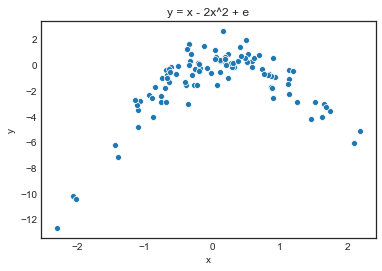

In [20]:
sns.scatterplot(x, y)
plt.title('y = x - 2x^2 + e')
plt.xlabel('x')
plt.ylabel('y')

Unsurprisingly, there is a downward parabola relationship.

(c) For this question, we will use the same method in labs to get the score. (remember 
negative score)   
But first, dataframe:

In [21]:
df = pd.DataFrame({'x': x, 'y': y})
df.tail()

,x,y
95,0.077340,-1.562061
96,-0.343854,0.021995
97,0.043597,0.460078
98,-0.620001,-0.577851
99,0.698032,0.767977


In [22]:
# set parameters
p_order = np.arange(1,5)
scores = []
loo = LeaveOneOut()
loo.get_n_splits(df)
regr = skl_lm.LinearRegression()

# fitting and record score
for i in p_order:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(df.x.values.reshape(-1,1))
    score = cross_val_score(regr, x_poly, df.y, 
                            cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

# print out result
for i in p_order:
    print(f'Degree {i}: {scores[i-1]*-1}')

Degree 1: 6.260764331604616
Degree 2: 0.9142897072803661
Degree 3: 0.9268768781648812
Degree 4: 0.8669116865881079


(d) Simulate another dataset using seed = 10 and repeat the steps.

In [23]:
# set seed
np.random.seed(1544)

# Simulate data
x = np.random.normal(0, 1, 100)
error = np.random.normal(0, 1, 100)
y = x - 2 * (x**2) + error

# Create dataframe
df = pd.DataFrame({'x': x, 'y': y})
df.tail()

# set parameters
p_order = np.arange(1,5)
scores = []
loo = LeaveOneOut()
loo.get_n_splits(df)
regr = skl_lm.LinearRegression()

# fitting and record score
for i in p_order:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(df.x.values.reshape(-1,1))
    score = cross_val_score(regr, x_poly, df.y, 
                            cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

# print out result
for i in p_order:
    print(f'Degree {i}: {scores[i-1]*-1}')

Degree 1: 8.773583930939965
Degree 2: 0.9809518869028164
Degree 3: 0.9286488953095285
Degree 4: 0.9694278499125045


The result is different due to the randomness we introduced in the simulated data. 
Nevertheless, the main point is that linear does not fit well and quadratic did
as well as higher degree. 

(e) The quadratic models in (c) has the smallest MSE which is what we would expect
given the true relationship is quadratic. However, cubic model outperform on (d)
with different seed.

(f) Another loop is needed. Lets use statsmodel to improve our skills!

In [26]:
# set seed
np.random.seed(1)

# Simulate data
x = np.random.normal(0, 1, 100)
error = np.random.normal(0, 1, 100)
y = x - 2 * (x**2) + error

# Create dataframe
df = pd.DataFrame({'x': x, 'y': y})
df.tail()

# set parameters
p_order = np.arange(1,5)

# main loop
for i in p_order:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(df.x.values.reshape(-1,1))
    y = df.y
    model = sm.OLS(y, x_poly).fit()
    print('\n', model.summary().tables[1], '\n')


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4131      0.242     -5.849      0.000      -1.893      -0.934
x1             0.8610      0.272      3.162      0.002       0.321       1.401


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1350      0.115      1.169      0.245      -0.094       0.364
x1             1.0936      0.107     10.229      0.000       0.881       1.306
x2            -1.9846      0.085    -23.331      0.000      -2.153      -1.816


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1280      0.115      1.111      0.269      -0.101       0.357
x1             0.9065      0.187      4.842    

The model shows statistical significance of the linear and quadratic model. The result
agrees with the cross validation result above. 